<a href="https://colab.research.google.com/github/narayana-thota/Cnn-model-to-classify-images-of-plasticwaste/blob/main/waste_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"narayanathota","key":"9ff0c02da3332f1637f4b3a748e78320"}'}

In [14]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [15]:
!pip install kaggle opencv-python tqdm

In [21]:
!kaggle datasets download -d techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 99% 424M/427M [00:05<00:00, 98.3MB/s]
100% 427M/427M [00:05<00:00, 88.8MB/s]


In [22]:
!unzip waste-classification-data.zip -d waste_data


Streaming output truncated to the last 5000 lines.
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: waste_data/dataset/DATASE

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import warnings
from tqdm import tqdm
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

warnings.filterwarnings("ignore")

In [24]:
train_path = "waste_data/DATASET/TRAIN"
test_path = "waste_data/DATASET/TEST"


In [25]:
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
        data=pd.DataFrame({'image':x_data, 'label':y_data})


100%|██████████| 12565/12565 [00:34<00:00, 363.05it/s]


In [26]:
data.shape

(22564, 2)

([<matplotlib.patches.Wedge at 0x78e4dc1051d0>,
 [Text(-1.131700724955093, -0.20433665636913256, 'organic'),
  Text(1.1317007058237096, 0.20433676232660034, 'recycble')],
 [Text(-0.6396569314963568, -0.11549463186081406, '55.69%'),
  Text(0.6396569206829663, 0.11549469174981755, '44.31%')])

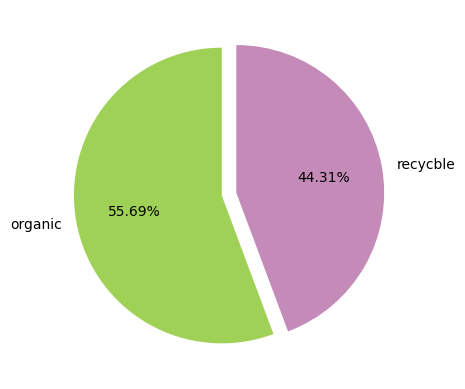

In [27]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['organic','recycble'],autopct='%0.2f%%',colors=colors,startangle=90,explode=[0.05,0.05])

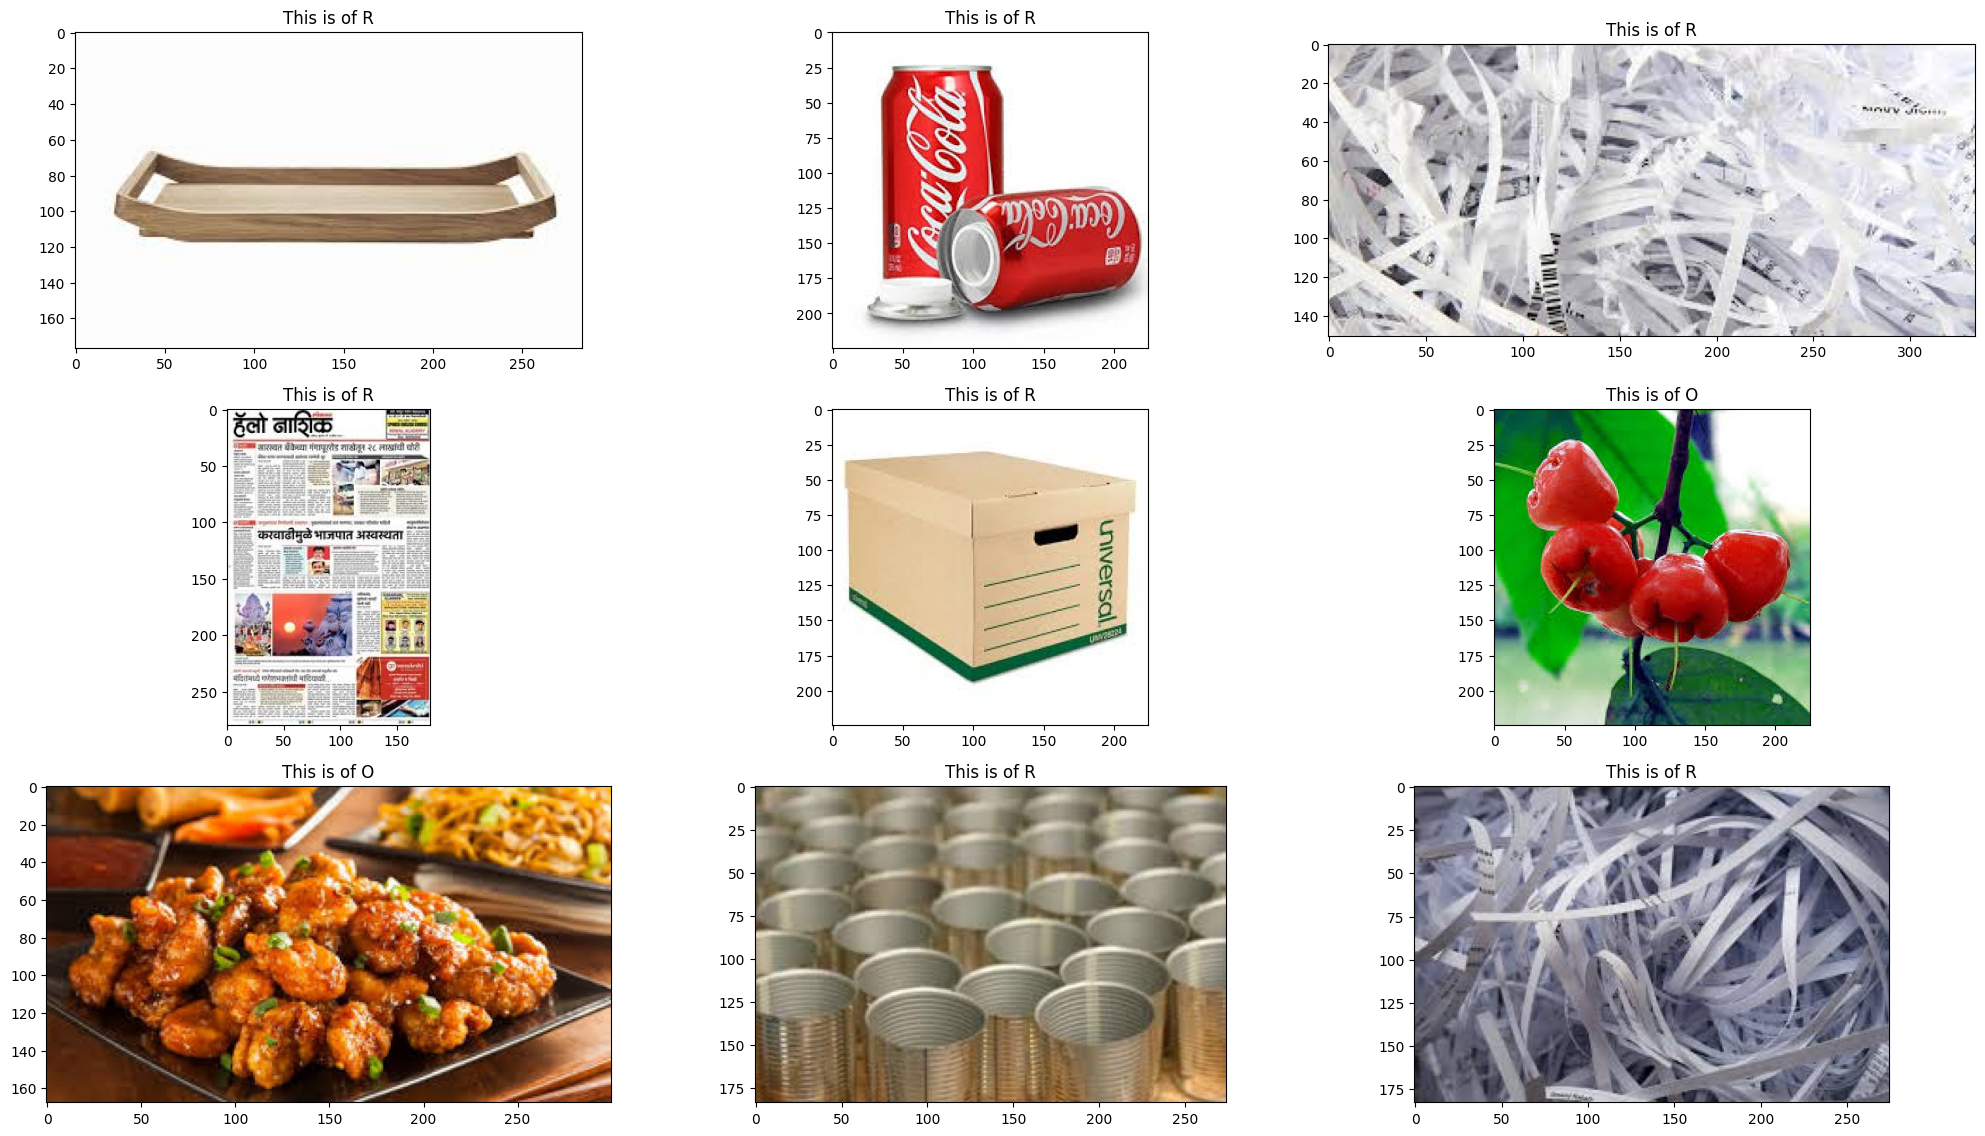

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [29]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256


In [30]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [34]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 100s 831ms/step - accuracy: 0.7148 - loss: 0.6649 - val_accuracy: 0.8659 - val_loss: 0.3682
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 56s 623ms/step - accuracy: 0.8260 - loss: 0.4256 - val_accuracy: 0.8711 - val_loss: 0.3471
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 57s 643ms/step - accuracy: 0.8380 - loss: 0.3940 - val_accuracy: 0.8818 - val_loss: 0.3233
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 58s 645ms/step - accuracy: 0.8648 - loss: 0.3482 - val_accuracy: 0.8667 - val_loss: 0.3408
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 58s 651ms/step - accuracy: 0.8696 - loss: 0.3270 - val_accuracy: 0.8790 - val_loss: 0.3070
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 82s 648ms/step - accuracy: 0.8868 - loss: 0.2885 - val_accuracy: 0.9001 - val_loss: 0.2675
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 58s 650ms/step - accuracy: 0.8995 - loss: 0.2604 - val_accuracy: 0.8687 - val_loss: 0.3316
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 55s 622ms/step - accuracy: 0.9086 - loss: 0.2318 - val_acc